In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import re
from nltk.corpus import stopwords

In [2]:
stu_all = pd.read_excel('Study3.xlsx',sheet_name=2,header=1).dropna()
(stu_all['Aspect'] < 5).sum()


# Clean the empty value
stu = stu_all[stu_all.At_video != 0.0]

tutorials = stu[(stu['Aspect'] <=4.0)]
tut_info = tutorials[['Aspect','Text']]

t1 = tutorials[(tutorials['Video'] == 'Tutorial1')]
t2 = tutorials[(tutorials['Video'] == 'Tutorial2')]
t3 = tutorials[(tutorials['Video'] == 'Tutorial3')]
t4 = tutorials[(tutorials['Video'] == 'Tutorial4')]


examples = stu[(stu['Aspect'] >= 5.0)]
exp_info = examples[['Aspect','Text']]

e1 = examples[(examples['Video'] == 'Example1')]
e2 = examples[(examples['Video'] == 'Example2')]
e3 = examples[(examples['Video'] == 'Example3')]
e4 = examples[(examples['Video'] == 'Example4')]

f1 = (t1['CommentId'].count() -17)  /(174)
f2 = (t2['CommentId'].count() -12)  /(457)
f3 = (t3['CommentId'].count() -12)  /(415)
f4 = (t4['CommentId'].count() -12) /(382)

f5 = (e1['CommentId'].count() -20) /(203)
f6 = (e2['CommentId'].count() -6) /(508)
f7 = (e3['CommentId'].count() -6) /(408)
f8 = (e4['CommentId'].count() -18) /(205)

print('Tutorials\n')
print('{:.2f} {}'.format(f1,174 ))
print('{:.2f} {}'.format(f2,457 ))
print('{:.2f} {}'.format(f3,415 ))
print('{:.2f} {}'.format(f4,382 ))
print('------------')
print('Examples\n')
print('{:.2f} {}'.format(f5,203 ))
print('{:.2f} {}'.format(f6,508 ))
print('{:.2f} {}'.format(f7,408 ))
print('{:.2f} {}'.format(f8,205 ))

x = [174,457,415,382,203,508,408,205]
y = [0.53,0.30,0.37,0.34,0.3,0.26,0.3,0.28]


Tutorials

0.70 174
0.27 457
0.38 415
0.35 382
------------
Examples

0.41 203
0.20 508
0.31 408
0.44 205


# Overall commenting frequency

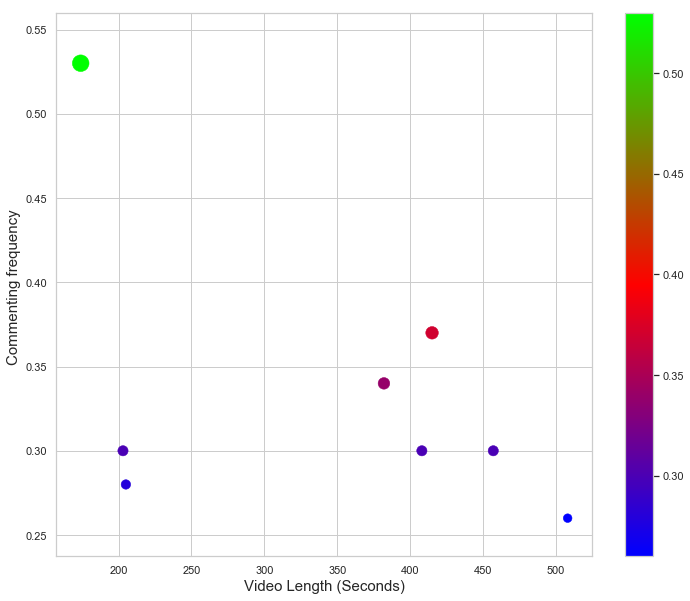

In [6]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def DrawBubble():#气泡图
    sns.set(style = "whitegrid")#设置样式
    z = y#用来调整各个点的大小s
    cm = plt.cm.get_cmap('brg')
    fig,ax = plt.subplots(figsize = (12,10))
    #注意s离散化的方法，因为需要通过点的大小来直观感受其所表示的数值大小
    #我所使用的是当前点的数值减去集合中的最小值后+0.1再*1000
    #参数是X轴数据、Y轴数据、各个点的大小、各个点的颜色
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 750, c = z, cmap = cm, linewidth = 0.5, alpha = 1)
    ax.grid()
    fig.colorbar(bubble)
    ax.set_xlabel('Video Length (Seconds)', fontsize = 15)#X轴标签
    ax.set_ylabel('Commenting frequency ', fontsize = 15)#Y轴标签
    plt.grid()
    plt.show()
if __name__=='__main__':
    DrawBubble()#气泡图


## Example 2

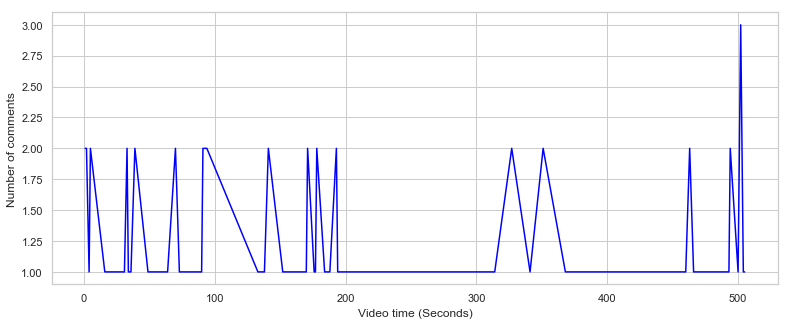

In [14]:
sort_example2 = e2['At_video'].values
l2 = sort_example2.tolist()

int_array2 = []

for i in l2:
    int_array2.append(int(i))

c = int_array2.sort()

dict = {}
for key in int_array2:
    dict[key] = dict.get(key, 0) + 1

k1 = []
v1 = []
for i in dict.keys():
    k1.append(i)
    v1.append(dict[i])

plt.figure(figsize=(13,5))
plt.plot(k1[1:-1],v1[1:-1],color = 'blue')#s-:方形

plt.xlabel("Video time (Seconds)")#横坐标名字
plt.ylabel("Number of comments")#纵坐标名字

plt.show()


## Tutorial 1

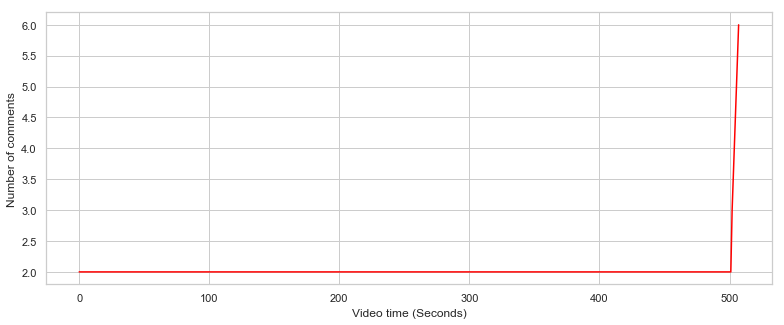

0.26


In [8]:
sort_tutorial1 = e2['At_video'].values
l1 = sort_tutorial1.tolist()

int_array = []

for i in l1:
    int_array.append(int(i))
    
a = {} 
for i in int_array: 
    if int_array.count(i)>1: 
        a[i] = int_array.count(i) 
a = sorted(a.items(), key=lambda item:item[0]) 

h = []
z = []

for i in a:
    h.append(i[0])
    z.append(i[1])

plt.figure(figsize=(13,5))
plt.plot(h,z,color = 'red')#s-:方形

plt.xlabel("Video time (Seconds)")#横坐标名字
plt.ylabel("Number of comments")#纵坐标名字

plt.show()

print(round((sum(z)/174),2))